In [1]:
import json

with open('pos_reviews.json') as data_file:    
    data_pos = json.load(data_file)
with open('neg_reviews.json') as data_file:    
    data_neg = json.load(data_file)

In [2]:
pos_texts = list(data_pos.keys())
neg_texts = list(data_neg.keys())
all_texts = pos_texts + neg_texts

In [3]:
len(all_texts)

2000

In [70]:
target = [1]*1000 + [0]*1000

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
cv = CountVectorizer()
m = cv.fit_transform(all_texts)

In [73]:
from sklearn.model_selection import cross_val_score

In [81]:
cross_val_score(
    LogisticRegression(solver='newton-cg'), m, target,
    cv=10, scoring='roc_auc')

array([0.9498, 0.9192, 0.9089, 0.8872, 0.9232, 0.9341, 0.9335, 0.9209,
       0.9163, 0.9044])

In [85]:
from sklearn.svm import LinearSVC

In [86]:
cross_val_score(
    LinearSVC(), m, target,
    cv=10, scoring='roc_auc')

/home/datagym.ta/jupyterhub/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/datagym.ta/jupyterhub/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/datagym.ta/jupyterhub/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/datagym.ta/jupyterhub/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/datagym.ta/jupyterhub/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to conver

array([0.9428, 0.903 , 0.8959, 0.8975, 0.9205, 0.9275, 0.9246, 0.9035,
       0.9183, 0.8958])

In [79]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
LogisticRegressionCV

In [7]:
666842/(2000*39659)

0.008407196348874152

In [8]:
import pandas as pd

In [9]:
import numpy as np

In [10]:
m_new = np.random.randint(1, 100, size=(2, 30))

In [11]:
import scipy as sp

In [12]:
sp.sparse.csr_matrix(m_new)

<2x30 sparse matrix of type '<class 'numpy.longlong'>'
	with 60 stored elements in Compressed Sparse Row format>

In [13]:
sp.sparse.hstack

<function scipy.sparse.construct.hstack(blocks, format=None, dtype=None)>

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier(max_depth=4)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(m, target)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
pd.DataFrame(zip(
    dtc.feature_importances_, cv.get_feature_names())
             ).sort_values(0, ascending=False).head(20)

,0,1
2954,0.299069,bad
1810,0.247164,and
39195,0.157474,worst
24063,0.062524,nothing
13406,0.045063,flat
24521,0.039085,only
5224,0.033987,by
21003,0.032885,ludicrous
3584,0.029929,believe
38817,0.021653,why


In [22]:
X_train, X_test, y_train, y_test = train_test_split(all_texts,
                                                    target)

In [35]:
cv = CountVectorizer()

In [51]:
%%time

cv_X_train = cv.fit_transform(X_train)

CPU times: user 963 ms, sys: 3.58 ms, total: 967 ms
Wall time: 964 ms


In [52]:
cv_X_test = cv.transform(X_test)

In [53]:
cv_X_train.shape

(1500, 35295)

In [54]:
cv_X_test.shape

(500, 35295)

In [40]:
dtc = DecisionTreeClassifier()

In [41]:
dtc.fit(cv_X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
dtc.predict(cv_X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

![](https://cs10.pikabu.ru/post_img/2019/12/29/10/1577636553192848361.jpg)

In [48]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression(solver='newton-cg')

In [63]:
%%time

lr.fit(cv_X_train, y_train)

CPU times: user 17.1 s, sys: 24.4 s, total: 41.4 s
Wall time: 1.74 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
pd.DataFrame(zip(lr.coef_[0], cv.get_feature_names())).sort_values(0)

,0,1
2622,-0.818815,bad
34898,-0.520179,worst
33023,-0.456973,unfortunately
18568,-0.450910,looks
21439,-0.448058,nothing
...,...,...
10505,0.371284,entertaining
34378,0.386741,well
27682,0.458977,seen
12649,0.480562,fun


In [65]:
from sklearn.linear_model import LinearRegression

In [69]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
Lasso

In [68]:
Ridge

sklearn.linear_model._ridge.Ridge

In [ ]:
ElasticNet

In [ ]:
LogisticRegression

In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
precision_score(y_test,
                (dtc.predict_proba(X_test)[:, 1]+0.1)//1
               )

0.0

In [26]:
recall_score(y_test,
                (dtc.predict_proba(X_test)[:, 1]+0.1)//1)

0.0

In [108]:
%matplotlib inline

In [109]:
from sklearn.tree import plot_tree

In [110]:
from matplotlib import pyplot as plt

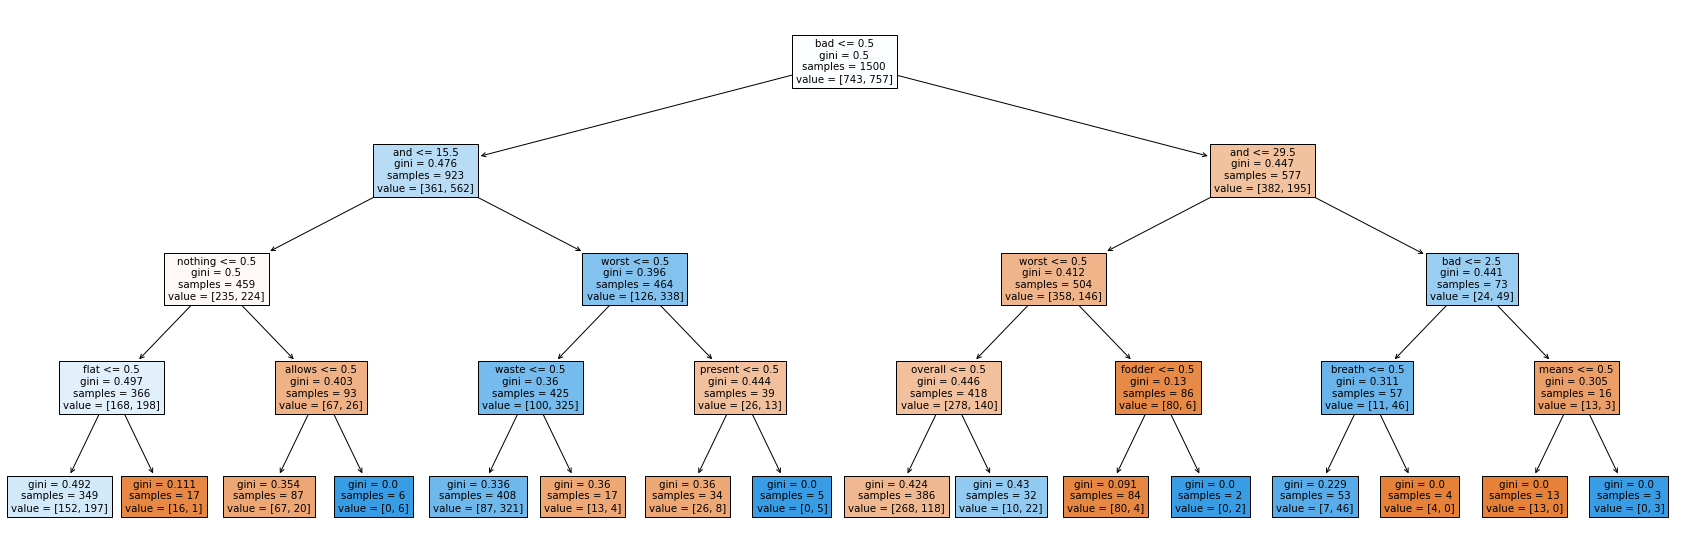

In [111]:
plt.figure(figsize=(30, 10))
plot_tree(dtc,
          feature_names=cv.get_feature_names(), filled=True);

In [112]:
import numpy as np
np.argmax(dtc.predict_proba(X_test), axis=1)
dtc.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [87]:
from sklearn.model_selection import GridSearchCV

In [92]:
3*5*5

75

In [94]:
gs = GridSearchCV(
    LogisticRegression(),
    {'penalty': ['l1', 'l2', 'none'],
     'C': [0.01, 0.1, 1, 2, 10] },
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=777
).fit(m, target)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
Memmapping (shape=(666842,), dtype=int32) to new file /tmp/joblib_memmapping_folder_4332_5199488016/4332-140105767653560-e205db2b81d94af3af7ded8bee81eb95.pkl
Pickling array (shape=(2001,), dtype=int32).
Memmapping (shape=(666842,), dtype=int64) to new file /tmp/joblib_memmapping_folder_4332_5199488016/4332-140105767653560-5cda9f619e7d4ca185ecb4d03dfe83e9.pkl
Pickling array (shape=(1600,), dtype=int64).
Pickling array (shape=(400,), dtype=int64).
Memmapping (shape=(666842,), dtype=int32) to old file /tmp/joblib_memmapping_folder_4332_5199488016/4332-140105767653560-e205db2b81d94af3af7ded8bee81eb95.pkl
Pickling array (shape=(2001,), dtype=int32).
Memmapping (shape=(666842,), dtype=int64) to old file /tmp/joblib_memmapping_folder_4332_5199488016/4332-140105767653560-5cda9f619e7d4ca185ecb4d03dfe83e9.pkl
Pickling array (shape=(1600,), dtype=int64).
Pickli

/home/datagym.ta/jupyterhub/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [98]:
gs.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)